### Team Presentation (A-1)

For the remainder of the semester our group will be working with a FIFA 18 COMPLETE PLAYER DATASET, that can be found on kaggle.com. The size of this dataset is approximately 17981 x 75, which includes features that range from the players name to their individual agility in the game. The dataset provides the positions played by the individual as well as their current salary from their respective club. It is also important to note that the players age and club is represented in the data. There are a few features within this dataset that we do not specifically need in order to answer our question such as their photo and team flag, which we have programmed to remove. With the time that we have worked with this dataset we realized that majority of the features are strings and need to be converted into an integer because there are some values represented as objects and we cannot use them. Along with missing data and attributes that include symbols that we will remove. Removing these feature will not specifically remove the player as a whole but just that specific attribute.This data is important to help develop the game and advance the sport of soccer. It would also be important to anyone who is responsible for paying the players because they would want to make sure they don’t overpay or miss out on a once in a lifetime player. These attributes give value to each specific player. There is a lot of importance when it comes to the success of the club as well because without good players the team won’t win. We think that this data could also be important to determine the longevity of a players career and determine if the player is really deserving of a large contract or that the club should pass on the player and select a younger player for their roster.
Working with this data set we are able to ask a few questions such as:
 What attributes have the most significance when it comes to a players salary?
Can we predict the players salary based on their position?
Relating specific attributes to an individual players salary. 
Given the players rating of … can their salary be determined?
Do certain positions pay more compared to others?	
Do certain teams pay more compared to others?
Can we predict a players’ position based on their ability rankings?
We think that initially we are going to look at our data set and try to analyze our problem as a regression type. We have discussed the ability to switch to a categorical question later on because we have a lot of data points and attributes that we could use. 

In [68]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [69]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Some of our data contains the strings "+" or "-" and we must remove that (Still need a good method for this!!!)
* We must remove the "€" and "K" from our wage values
* Convert all columns we use to a numeric data type

In [70]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [71]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

### Initial Graphs
* With just one X and one Y value
* Seaborn Pairplot

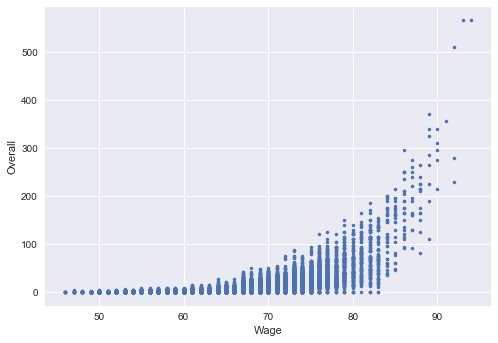

In [72]:
plt.plot(B, C,'.')
plt.ylabel('Overall')
plt.xlabel('Wage')
plt.show()

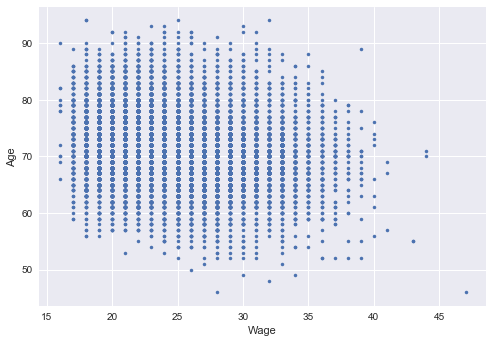

In [73]:
plt.plot(A, D,'.')
plt.ylabel('Age')
plt.xlabel('Wage')
plt.show()

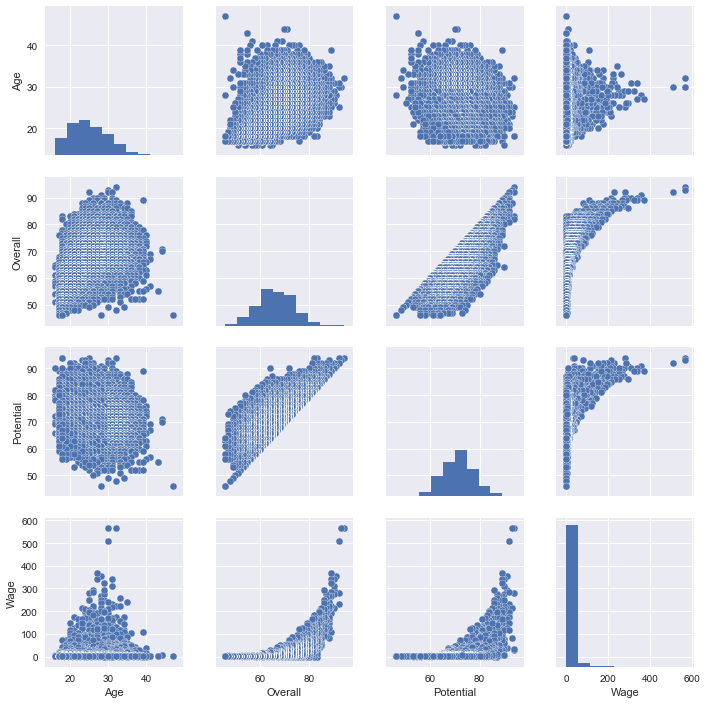

In [74]:
sn.pairplot(fifa)
plt.show()

### Linear Regression
* X = Potential and Y = Wage
* X = Age and Y = Wage

In [75]:
X = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Potential']])).transpose()
Y = np.array(fifa.loc[:, 'Wage'])

In [76]:
n = X.shape[0]
test = int(0.20*n)            
perm = rn.permutation(n)   
X = X[perm]
Y = Y[perm]
X_test = X[:test]       
Y_test = Y[:test]
X_train = X[test:]     
Y_train = Y[test:]

In [77]:
reg = LinearRegression().fit(X_test, Y_test)
b, m = reg.intercept_, *reg.coef_
b, m

(-119.7933091204828, 1.8421467913590008)

In [78]:
reg = LinearRegression().fit(X_train, Y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(-130.34939120899145, 1.993883823588454)

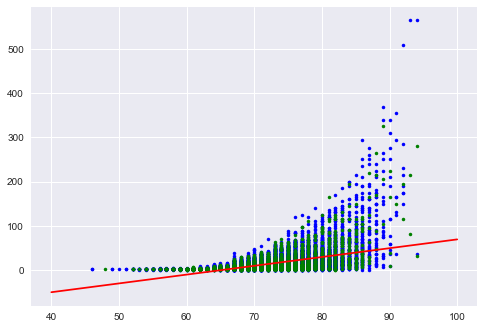

In [79]:
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_test, Y_test, 'g.')
xx = np.linspace(40, 100, 50)
yy = b + m*xx
plt.plot(xx, yy, 'r-')
plt.show();

In [80]:
print('The training: {}'.format(reg.score(X_train, Y_train)))
print('The testing: {}'.format(reg.score(X_test, Y_test)))

The training: 0.26775167758377827
The testing: 0.27704394788869746


In [81]:
X = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Age']])).transpose()
Y = np.array(fifa.loc[:, 'Wage'])

In [82]:
n = X.shape[0]
test = int(0.20*n)            
perm = rn.permutation(n)   
X = X[perm]
Y = Y[perm]
X_test = X[:test]       
Y_test = Y[:test]
X_train = X[test:]     
Y_train = Y[test:]

In [83]:
reg = LinearRegression().fit(X_test, Y_test)
b, m = reg.intercept_, *reg.coef_
b, m

(-9.6409367142881042, 0.8626063066978672)

In [84]:
reg = LinearRegression().fit(X_train, Y_train)
b, m = reg.intercept_, *reg.coef_
b, m

(-6.7450482245830461, 0.72249825485328434)

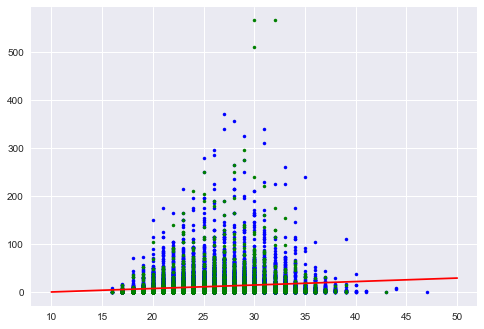

In [85]:
plt.plot(X_train, Y_train, 'b.')
plt.plot(X_test, Y_test, 'g.')
xx = np.linspace(10, 50, 5)
yy = b + m*xx
plt.plot(xx, yy, 'r-')
plt.show();

In [86]:
print('The training: {}'.format(reg.score(X_train, Y_train)))
print('The testing: {}'.format(reg.score(X_test, Y_test)))

The training: 0.023349813163185185
The testing: 0.019759204989575285


### Nonlinear Regression 

In [87]:
# Produce a numpy array with the Length variable and another with the Whole_Weight

X = np.atleast_2d(np.array([float(h) for h in fifa.loc[:, 'Overall']])).transpose()
# Recall that we need an array of shape (n, 1) and so there are some numpy.array manipulations needed

y = np.array(fifa.loc[:, 'Wage'])

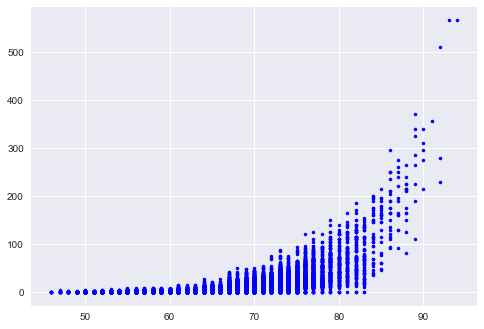

In [88]:
plt.plot(X, y, 'b.')
plt.show();

In [89]:
X2 = np.atleast_2d(np.array([x**2 for x in X]))
X = np.concatenate([X, X2], axis=1)

In [90]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [91]:
reg = LinearRegression().fit(X_train, y_train)
c, b, a = reg.intercept_, *reg.coef_
c, b, a

(630.34420753270365, -20.879356979335924, 0.17225543130680107)

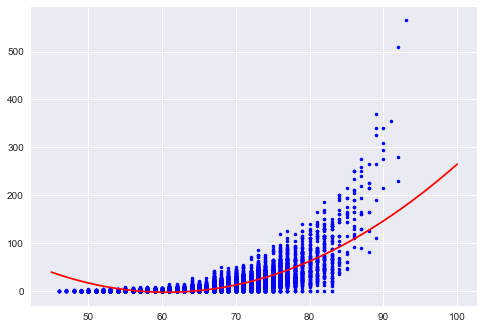

In [92]:
plt.plot(X_train[:, 0], y_train, 'b.')
plt.plot(X_test[:, 0], y_test, 'b+')
xx = np.linspace(45, 100, 45)
yy = a*xx**2 + b*xx + c
plt.plot(xx, yy, 'r-')
plt.show();

In [93]:
print('The training R2: {}'.format(reg.score(X_train, y_train)))
print('The testing R2: {}'.format(reg.score(X_test, y_test)))

The training R2: 0.6202901873915454
The testing R2: 0.6120661787150387


## Applying Bootstraping + Cross Validation method
* Cross Validation 1st
* Bootstrap 2nd

In [94]:
X = np.array(fifa.loc[:, ['Overall']])
y = np.array(fifa.loc[:, 'Wage'])

In [95]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [96]:
#CROSS VALIDATION
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
R2 = pa.DataFrame( np.array([ [0]*5, [0]*5, [0]*5, [0]*5]).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])
# Making a DataFrame to record the R2 values in

for k in range(5):
    X_test = X[k*test:(k+1)*test]       # Then create the test
    y_test = y[k*test:(k+1)*test]
    X_train = np.concatenate( (X[:k*test], X[(k+1)*test:]), axis=0)     # and train sets
    y_train = np.concatenate( (y[:k*test], y[(k+1)*test:]), axis=0)
    reg = LinearRegression().fit(X_train, y_train)
    reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)

R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = [0, 1, 2, 3, 4, 'Mean', 'Standard Deviation']
R2

,train_1,test_1,train_2,test_2
0,0.350369,0.360243,0.350369,0.360243
1,0.360862,0.311573,0.360862,0.311573
2,0.360642,0.319266,0.360642,0.319266
3,0.343209,0.394702,0.343209,0.394702
4,0.348004,0.366418,0.348004,0.366418
Mean,0.352617,0.350440,0.352617,0.350440
Standard Deviation,0.007032,0.030961,0.007032,0.030961


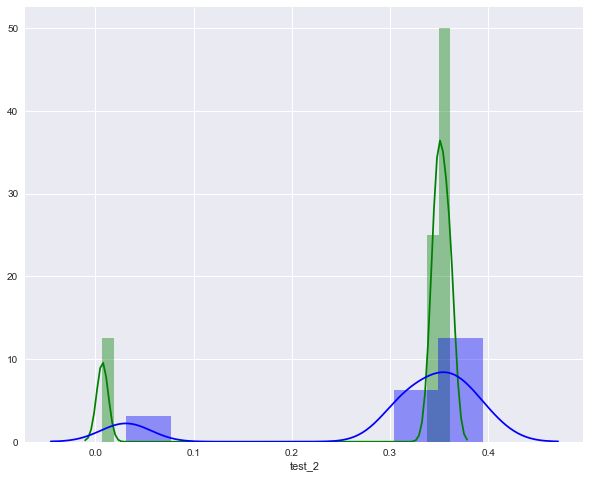

In [97]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 2], color='green')
sn.distplot(R2.iloc[:num, 3], color='blue')
plt.show();

In [98]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [99]:
test = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LinearRegression().fit(X_train, y_train)
    reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
32,0.374541,0.332740,0.374541,0.332740
33,0.364040,0.330640,0.364040,0.330640
34,0.332608,0.340240,0.332608,0.340240
35,0.366544,0.309246,0.366544,0.309246
36,0.360944,0.314145,0.360944,0.314145
37,0.342609,0.367804,0.342609,0.367804
38,0.374582,0.380601,0.374582,0.380601
39,0.356075,0.345264,0.356075,0.345264
Mean,0.355903,0.370680,0.355903,0.370680
Standard Deviation,0.010939,0.010534,0.010939,0.010534


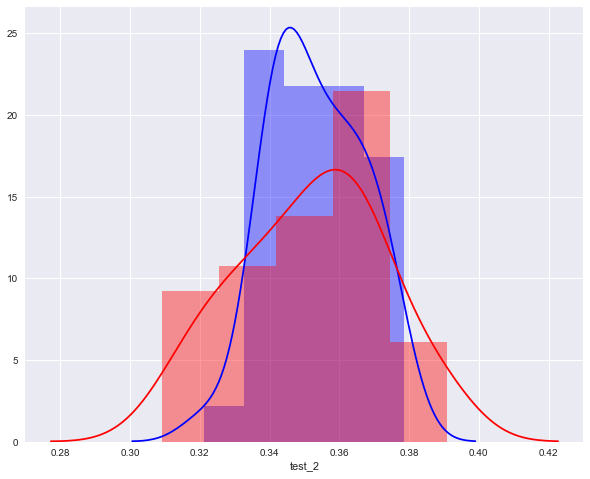

In [100]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 2], color='blue')
sn.distplot(R2.iloc[:num, 3], color='red')
plt.show();

## PCA Method
* Used columns Age and Overall vs Wage 

### PCA 1

In [115]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
# Build a matrix of the predictors and results

X = np.array(fifa.iloc[:,[1,3]])
y = np.array(fifa.iloc[:, 7])


In [102]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [103]:
# The explained variance quantifies the propotion of the variation in the values of X that have been explained by each component
print(pca.explained_variance_ratio_)

[ 0.78854092  0.21145908]


In [104]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

In [105]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.22926659714980882, 0.22191323692992213)

In [106]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -25.0, 20.0
    y_min, y_max = -10.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.3678966394187255
Testing R2: 0.3893660596259144


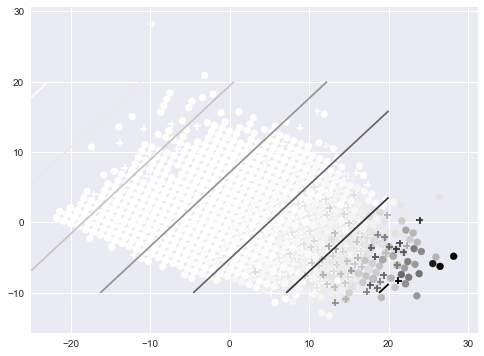

In [107]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show();

* Used Age and Wage vs Overall

### Check with bootstrap

In [119]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [120]:
test = int(0.20*n)
R3 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LinearRegression().fit(X_train, y_train)
    reg3 = LinearRegression().fit(X_train[:, 0:6], y_train)
    
    R3.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R3.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R3.loc[k, 'train_2'] = reg3.score(X_train[:, 0:6], y_train)
    R3.loc[k, 'test_2'] = reg3.score(X_test[:, 0:6], y_test)
    
R3mean = [0]*4
R3std = [0]*4
for c in range(4):
    R3mean[c] = np.mean(R3.iloc[0:5, c])
    R3std[c] = np.std(R3.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
32,0.386318,0.388084,0.386318,0.388084
33,0.381937,0.411690,0.381937,0.411690
34,0.374435,0.399844,0.374435,0.399844
35,0.375525,0.387297,0.375525,0.387297
36,0.366996,0.396767,0.366996,0.396767
37,0.363024,0.389984,0.363024,0.389984
38,0.389644,0.351871,0.389644,0.351871
39,0.368054,0.401467,0.368054,0.401467
Mean,0.370330,0.374893,0.370330,0.374893
Standard Deviation,0.012813,0.019678,0.012813,0.019678


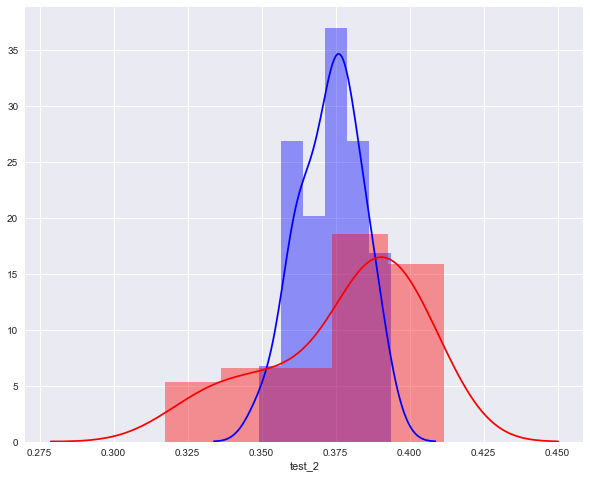

In [121]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 2], color='blue')
sn.distplot(R2.iloc[:num, 3], color='red')
plt.show();

### PCA 2

In [108]:
X = np.array(fifa.iloc[:,[1,7]])
y = np.array(fifa.iloc[:, 3])

In [109]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [110]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

In [111]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = 0, 400.0
    y_min, y_max = -5.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

In [112]:
cat1 = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.11101842196732707, 0.11484983314794216)

Training R2: 0.492416521057964
Testing R2: 0.4958788698531638


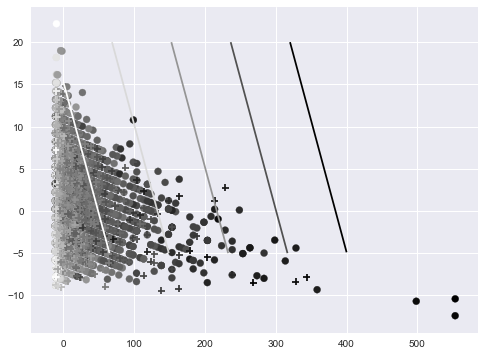

In [113]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show();

### Check with bootstrap

In [116]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [117]:
test = int(0.20*n)
R2 = pa.DataFrame( np.array([ [0]*num]*4).transpose(), columns = ['train_1', 'test_1', 'train_2', 'test_2'])

for k in range(num):
    X_test = Xboot[k][:test]
    y_test = yboot[k][:test]
    X_train = Xboot[k][test:]
    y_train = yboot[k][test:]
    reg = LinearRegression().fit(X_train, y_train)
    reg2 = LinearRegression().fit(X_train[:, 0:6], y_train)
    
    R2.loc[k, 'train_1'] = reg.score(X_train, y_train)
    R2.loc[k, 'test_1'] = reg.score(X_test, y_test)
    R2.loc[k, 'train_2'] = reg2.score(X_train[:, 0:6], y_train)
    R2.loc[k, 'test_2'] = reg2.score(X_test[:, 0:6], y_test)
    
R2mean = [0]*4
R2std = [0]*4
for c in range(4):
    R2mean[c] = np.mean(R2.iloc[0:5, c])
    R2std[c] = np.std(R2.iloc[0:5, c])
    
R2 = R2.append( pa.Series(R2mean, index=R2.columns), ignore_index=True )
R2 = R2.append( pa.Series(R2std, index=R2.columns), ignore_index=True)
R2.index = list(range(num)) + ['Mean', 'Standard Deviation']
R2.tail(10)

,train_1,test_1,train_2,test_2
32,0.362918,0.385659,0.362918,0.385659
33,0.350637,0.357467,0.350637,0.357467
34,0.370965,0.396333,0.370965,0.396333
35,0.375927,0.378194,0.375927,0.378194
36,0.378303,0.360358,0.378303,0.360358
37,0.386928,0.395158,0.386928,0.395158
38,0.377574,0.354277,0.377574,0.354277
39,0.349118,0.359615,0.349118,0.359615
Mean,0.371567,0.370917,0.371567,0.370917
Standard Deviation,0.005760,0.029953,0.005760,0.029953


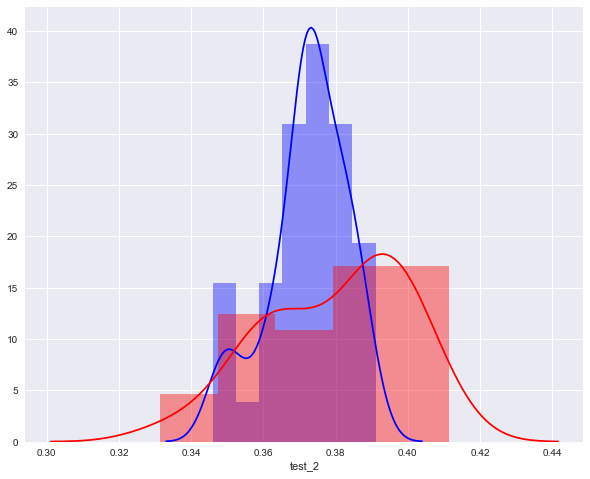

In [118]:
plt.figure(figsize = (10, 8))
sn.distplot(R2.iloc[:num, 2], color='blue')
sn.distplot(R2.iloc[:num, 3], color='red')
plt.show();

# K-Nearest Neighbors

In [153]:
from sklearn.neighbors import KNeighborsRegressor

In [203]:
X = np.array(fifa[['Overall', 'Age']])
y = np.array(fifa.iloc[:, 7])

In [204]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [205]:
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X= X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [228]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01
    
    x_min, x_max = -0.5,1.5
    y_min, y_max = -0.5,1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.628626570979572
Testing R2: 0.38076834355399636


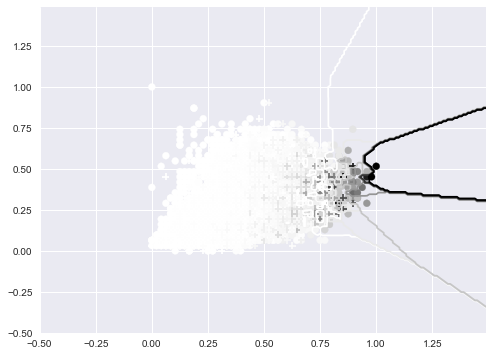

In [229]:
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

Training R2: 0.7661637219453316
Testing R2: 0.6685627221287216


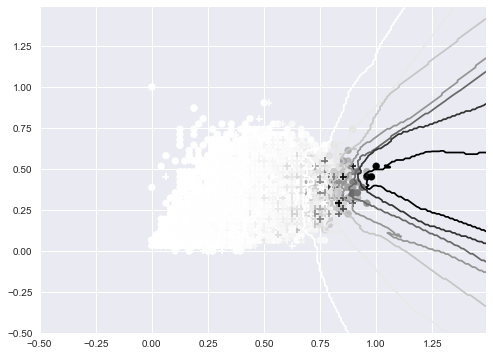

In [230]:
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)
plt.show()

### Checking with Bootstrap

In [231]:
num = 40 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for k in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[k] = X[sample, :]
    yboot[k] = y[sample]

In [240]:
test = int(0.20*n)
maxk = 10

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsRegressor(n_neighbors=k+1) # Define the model
        clf.fit(X_train, y_train) # Train the model
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,train_6,test_6,train_7,test_7,train_8,test_8,train_9,test_9,train_10,test_10
37,0.686796,0.602286,0.756537,0.697976,0.779830,0.726016,0.787427,0.747191,0.785732,0.737705,0.789905,0.745665,0.790219,0.748739,0.789087,0.754693,0.788260,0.762906,0.786791,0.769367
38,0.697713,0.608159,0.758055,0.664973,0.776812,0.677514,0.782425,0.708092,0.776471,0.719486,0.780562,0.720196,0.780447,0.723760,0.778122,0.726688,0.779495,0.722562,0.776427,0.715775
39,0.640378,0.523026,0.735882,0.625328,0.741005,0.626415,0.762914,0.651063,0.762216,0.657417,0.762644,0.664814,0.761184,0.665264,0.762449,0.674325,0.763275,0.680130,0.764760,0.680524
Mean,0.646980,0.564314,0.736769,0.666959,0.759545,0.692594,0.769309,0.707169,0.771373,0.714619,0.772541,0.720429,0.771871,0.723669,0.771019,0.726106,0.769461,0.727124,0.767678,0.726680
Standard Deviation,0.031843,0.077341,0.021103,0.053015,0.019553,0.047695,0.017479,0.043098,0.016561,0.037993,0.016551,0.035211,0.017416,0.032964,0.017021,0.031460,0.017176,0.030571,0.016672,0.030027
